# Predict U.S. Airbnb Prices
# We will use 226,029 Airbnb listings to build a model to predict the Airbnd prices

# First we start by importing our libraries and then importing our data using PANDAS.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('AB_US_2020.csv')

/Users/1kaptaan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Now we will look at the data head, description, Information and then look at the columns we are working with.

In [5]:
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.43145,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.68321,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.01000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.23000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.81000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,2.06000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.06000,593.000000,365.000000


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

# We go on and drop the columns that clearly don't affect the price.

In [9]:
df = df.drop(['id','name','host_id','host_name'],axis=1)

In [10]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

# Further we look at some visualizations to get some insights of the data.

# The countplot below shows the number of different rooms.

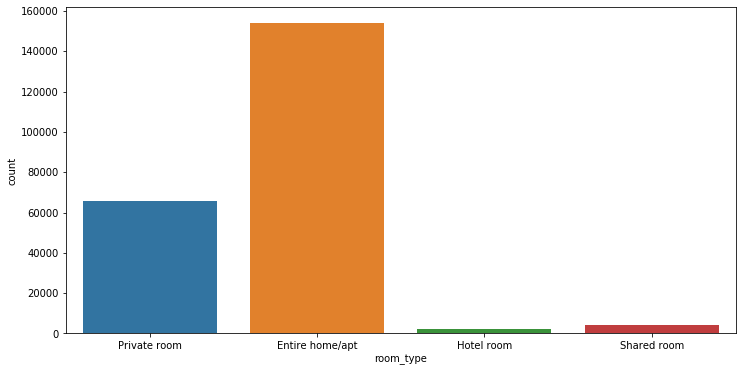

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df['room_type'])

# From the distribution plot below it is clear that the price is mostly distributed in an area with some outliers.

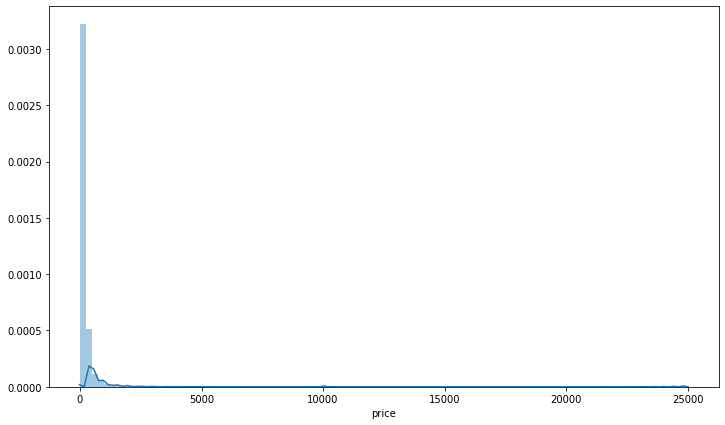

In [12]:
plt.figure(figsize=(12,7))
sns.distplot(df['price'],kde=True,bins=100)

# This scatterplot shows that entire home/apt are the one that have the outliers as they can be usually higher in price.

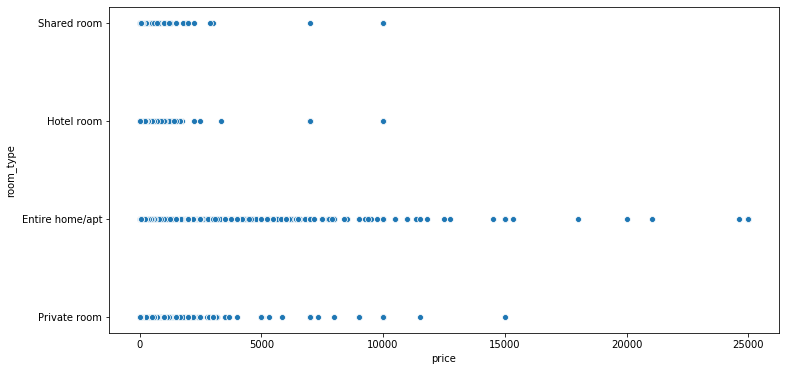

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='room_type',data=df)

# With the heatmap we can clearly look at the factors that are in high correlation with the price.

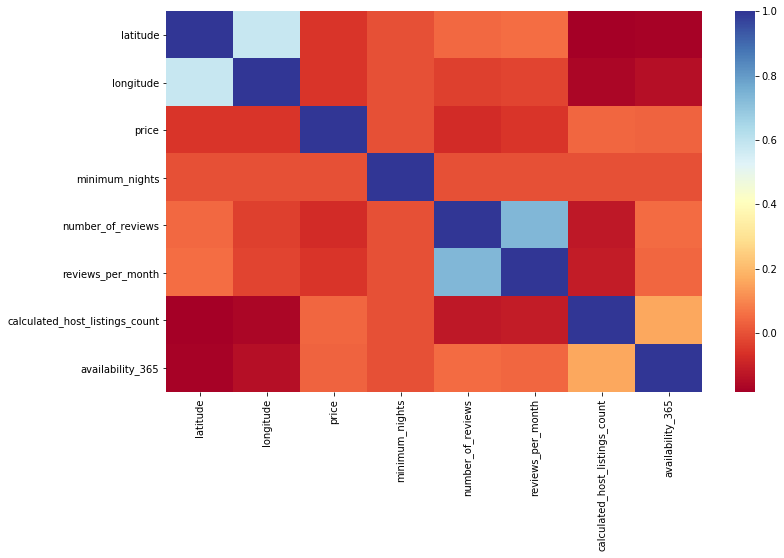

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cmap='RdYlBu')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood_group             110185 non-null  object 
 1   neighbourhood                   226030 non-null  object 
 2   latitude                        226030 non-null  float64
 3   longitude                       226030 non-null  float64
 4   room_type                       226030 non-null  object 
 5   price                           226030 non-null  int64  
 6   minimum_nights                  226030 non-null  int64  
 7   number_of_reviews               226030 non-null  int64  
 8   last_review                     177428 non-null  object 
 9   reviews_per_month               177428 non-null  float64
 10  calculated_host_listings_count  226030 non-null  int64  
 11  availability_365                226030 non-null  int64  
 12  city            

# We need to convert the strings into dummies that can be easily read and understood by our machine learning model.

In [21]:
ng = pd.get_dummies(df['neighbourhood_group'],drop_first=True)

In [22]:
n = pd.get_dummies(df['neighbourhood'],drop_first=True)

In [23]:
rt = pd.get_dummies(df['room_type'],drop_first=True)

In [24]:
c = pd.get_dummies(df['city'],drop_first=True)

In [25]:
df = pd.concat([df,ng,n,rt,c],axis=1)

In [26]:
df = df.drop(['neighbourhood_group','neighbourhood','room_type','city'],axis=1)

In [16]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace(np.nan,'ND')

In [17]:
df['neighbourhood_group'].unique()

array(['ND', 'Hawaii', 'Kauai', 'Maui', 'Honolulu', 'Other Cities',
       'City of Los Angeles', 'Unincorporated Areas', 'Manhattan',
       'Brooklyn', 'Queens', 'Staten Island', 'Bronx', 'Providence',
       'Washington', 'Newport', 'Bristol', 'Kent', 'Central Area',
       'Other neighborhoods', 'West Seattle', 'Downtown', 'Ballard',
       'Capitol Hill', 'Beacon Hill', 'Seward Park', 'Queen Anne',
       'Rainier Valley', 'Lake City', 'Cascade', 'Delridge',
       'University District', 'Northgate', 'Magnolia', 'Interbay'],
      dtype=object)

In [18]:
df['neighbourhood'].unique()

array(['28804', '28801', '28806', ..., 'Near Southeast, Navy Yard',
       'Eastland Gardens, Kenilworth',
       'Woodland/Fort Stanton, Garfield Heights, Knox Hill'], dtype=object)

In [19]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [20]:
df['last_review'] = df['last_review'].replace(np.nan,'ND')

In [52]:
df['last_review'] = pd.to_datetime(df['last_review'])

# The heatmap below shows that we don't have any missing data in out DataFrame.

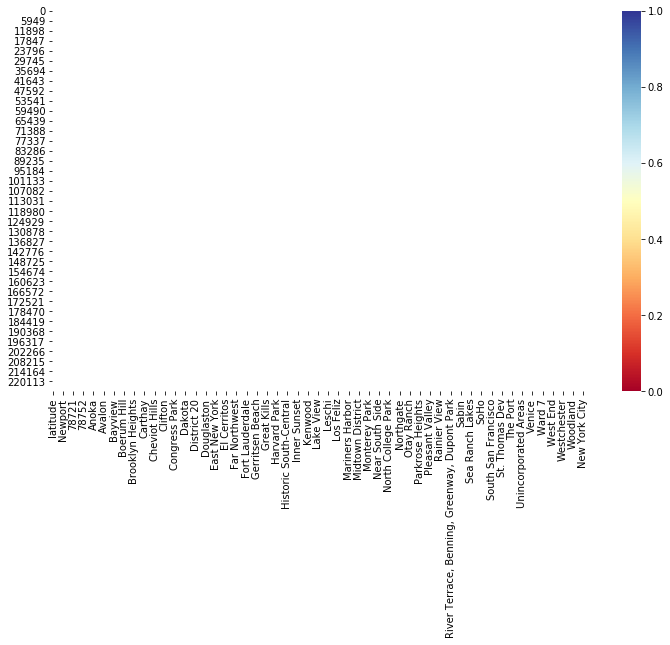

In [27]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cmap='RdYlBu')

In [28]:
df.head(4)

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Beacon Hill,...,Rhode Island,Salem,San Clara Country,San Diego,San Francisco,San Mateo County,Santa Cruz County,Seattle,Twin Cities MSA,Washington D.C.
0,35.65146,-82.62792,60,1,138,16/02/20,1.14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35.59779,-82.55540,470,1,114,07/09/20,1.03,11,288,0,...,0,0,0,0,0,0,0,0,0,0
2,35.60670,-82.55563,75,30,89,30/11/19,0.81,2,298,0,...,0,0,0,0,0,0,0,0,0,0
3,35.57864,-82.59578,90,1,267,22/09/20,2.39,5,0,0,...,0,0,0,0,0,0,0,0,0,0


# We now divide our dataframe into the prediction variable (y) and the Dependent variables (x).

In [30]:
X = df.drop('price',axis=1)

In [31]:
y = df['price']

# Now we split our data into training and testing data.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.33,random_state = 101)

# After splitting the data we scale the data with MinMaxScaler in order for our model to read data easily. 

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

# We need to convert any string value to integer in order to fit and transform our test and train data.

In [36]:
X_train = X_train.drop('last_review',axis=1)

In [37]:
X_train = X_train.replace('ND',0)

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = X_test.drop('last_review',axis=1)

In [40]:
X_test = X_test.replace('ND',0)

In [41]:
X_test = scaler.transform(X_test)

# Now that we are done with scaling our data we can go ahead and create our deep learning model.

# We are gonna use tensorflow library.

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# With the help of Sequential we will create our sequential model and with the help of Dense and Dropout we will add layers and dropout layers.

In [100]:
model = Sequential()

model.add(Dense(1522,activation='relu')) # This is the first layer with 1522 neurons and 50% dropped layers.
model.add(Dropout(.5))                   # We have rectified linear activation function as the activator.

model.add(Dense(710,activation='relu'))  # 2nd layer with 710 neurons and 50% dropout layers.
model.add(Dropout(.5))

model.add(Dense(305,activation='relu'))  # 3rd layer with 305 neurons and 50% dropout layers.
model.add(Dropout(.5))

model.add(Dense(150,activation='relu'))  # 4th layer with 150 neurons and 50% dropout layers.
model.add(Dropout(.5 ))

model.add(Dense(1,activation='relu'))    # The final output layer with a single output neuron.

model.compile(optimizer = 'adam', loss='msle')
# Now we compile the model and use adam optimizer and track msle (mean square logistic error).

In [101]:
model.fit(x = X_train,
         y = y_train,
         validation_split=.30, # 30% of training data will be used as validation data.
         epochs=25,            # 25 times the data will be passed through the model.
         verbose=1,
         batch_size = 1000,    # Data will be passed in the batches of 1000.
         shuffle=True)         # The data will be passed randomly.

Epoch 1/25

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

107/107 [==============================] - 15s 141ms/step - loss: 1.7491 - val_loss: 0.4776
Epoch 2/25
107/107 [==============================] - 17s 156ms/step - loss: 0.4846 - val_loss: 0.4433
Epoch 3/25
107/107 [==============================] - 15s 141ms/step - loss: 0.4637 - val_loss: 0.4327
Epoch 4/25
107/107 [==============================] - 15s 137ms/step - loss: 0.4511 - val_loss: 0.4282
Epoch 5/25
107/107 [==============================] - 14s 133ms/step - loss: 0.4420 - val_loss: 

# Once we are done training the model we go ahead and look at loss our model has and check for Underfitting and Overfitting.

In [103]:
loss = pd.DataFrame(model.history.history)

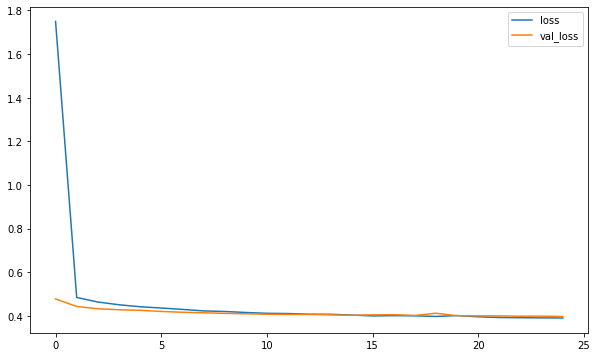

In [114]:
loss.plot(figsize=(10,6))

# Now we go ahead and test our data and get our predictions.

In [106]:
pred = model.predict(X_test)

# Now that we are done with the predictions we will go ahead and check a sample for testing whether our model predicts the price or not.

In [111]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Beacon Hill,...,Rhode Island,Salem,San Clara Country,San Diego,San Francisco,San Mateo County,Santa Cruz County,Seattle,Twin Cities MSA,Washington D.C.
0,35.651460,-82.627920,60,1,138,2020-02-16,1.14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35.597790,-82.555400,470,1,114,2020-07-09,1.03,11,288,0,...,0,0,0,0,0,0,0,0,0,0
2,35.606700,-82.555630,75,30,89,2019-11-30,0.81,2,298,0,...,0,0,0,0,0,0,0,0,0,0
3,35.578640,-82.595780,90,1,267,2020-09-22,2.39,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.614420,-82.541270,125,30,58,2015-10-19,0.52,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,38.903880,-77.029730,104,1,0,1970-01-01,ND,2,99,0,...,0,0,0,0,0,0,0,0,0,1
226026,38.920820,-76.990980,151,2,0,1970-01-01,ND,1,300,0,...,0,0,0,0,0,0,0,0,0,1
226027,38.911170,-77.033540,240,2,0,1970-01-01,ND,1,173,0,...,0,0,0,0,0,0,0,0,0,1
226028,38.926630,-77.044360,60,21,0,1970-01-01,ND,5,362,0,...,0,0,0,0,0,0,0,0,0,1


# We take the below entry as our sample. Drop the price value and then reshape it to transform and then pass through the model to predict the price.

In [131]:
sample = df.iloc[555].drop(['price','last_review'])

In [132]:
s1=sample.values.reshape(-1,1520)

In [133]:
s1

array([[35.58998, -82.51724, 1, ..., 0, 0, 0]], dtype=object)

In [134]:
s1 = scaler.transform(s1)

In [135]:
model.predict(s1)

array([[162.21822]], dtype=float32)

In [138]:
df.iloc[555]

latitude               35.59
longitude           -82.5172
price                    213
minimum_nights             1
number_of_reviews         42
                      ...   
San Mateo County           0
Santa Cruz County          0
Seattle                    0
Twin Cities MSA            0
Washington D.C.            0
Name: 555, Length: 1522, dtype: object

# This way we can use the above deep learning model for price prediction of any airbnb.